[       0    86400   172800   259200   345600   432000   518400   604800
   691200   777600   864000   950400  1036800  1123200  1209600  1296000
  1382400  1468800  1555200  1641600  1728000  1814400  1900800  1987200
  2073600  2160000  2246400  2332800  2419200  2505600  2592000  2678400
  2764800  2851200  2937600  3024000  3110400  3196800  3283200  3369600
  3456000  3542400  3628800  3715200  3801600  3888000  3974400  4060800
  4147200  4233600  4320000  4406400  4492800  4579200  4665600  4752000
  4838400  4924800  5011200  5097600  5184000  5270400  5356800  5443200
  5529600  5616000  5702400  5788800  5875200  5961600  6048000  6134400
  6220800  6307200  6393600  6480000  6566400  6652800  6739200  6825600
  6912000  6998400  7084800  7171200  7257600  7344000  7430400  7516800
  7603200  7689600  7776000  7862400  7948800  8035200  8121600  8208000
  8294400  8380800  8467200  8553600  8640000  8726400  8812800  8899200
  8985600  9072000  9158400  9244800  9331200  9417

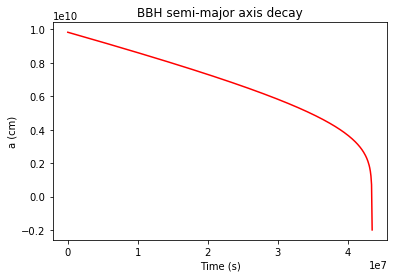

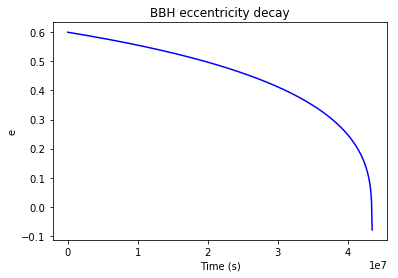

In [5]:
# This program solves the coupled set of ODEs given by equations 5.6 & 5.7 in Peters (1964)
# BBH_eccentricity: program that calculates the eccentricity evolution of a
# binary black hole system using eqns 5.6 & 5.7 from Peters (1964).

# Note: all constants & masses are in CGS units

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#--------------------------------------------------------------------------
# Constants:

G = 6.674e-8           # Gravitational constant (cm^3/g/s)
c = 2.998e10           # speed of light (cm/s)
Msun = 1.98e33         # solar mass (g)
AU = 1.496e13          # Astronomical Unit (cm)
day = 60*60*24         # 1 day (s)

# Binary attributes:

m1 = 30*Msun            # mass of primary BH
m2 = 8*Msun            # mass of secondary BH
Rs1 = (2*G*m1)/(c**2)  # Schwarzchild radius of primary BH
Rs2 = (2*G*m2)/(c**2)  # Schwarzchild radius of secondary BH
ei = 0.6;              # intial binary eccentricity
P = 0.001*day
ai = (P**2*G*(m1+m2)/(4*np.pi**2))**(1/3); # initial semi-major axis

dt = 60*60*24
time = np.arange(0,504*day,dt)

# Coupled ODEs:
aa = [ai]
ee = [ei]

for i in range(1,np.size(time)):
    a_old = aa[i-1]
    e_old = ee[i-1]
    
    dadt = -(64/5) * (G**3*m1*m2*(m1+m2))/(c**5*a_old**3*(1-e_old**2)**(7/2)) * (1+(73/24)*e_old**2+(37/96)*e_old**4)
    dedt = -(304/15) * e_old * (G**3*m1*m2*(m1+m2))/(c**5*a_old**4*(1-e_old**2)**(5/2)) * (1+(121/304)*e_old**2)
        
    a_new = a_old + dt*dadt
    e_new = e_old + dt*dedt
    
    aa = aa + [a_new]
    ee = ee + [e_new]


f1 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.plot(time,aa,color='red')
plt.title('BBH semi-major axis decay')
plt.xlabel('Time (s)')
plt.ylabel(r'a (cm)')
plt.show()

f2 = plt.figure()
ax2 = f2.add_subplot(111)
ax2.plot(time,ee,color='blue')
plt.title('BBH eccentricity decay')
plt.xlabel('Time (s)')
plt.ylabel(r'e')
plt.show()

